In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('population_diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Check if all the features are numeric

In [3]:
df.info()

# 1. We can see there are no null values. 
# 2. All columns are numerical. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Given dataset contains many (zero) values, replace 0 with NaN value. (Difficulty)

In [4]:
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[columns_to_clean] =  df[columns_to_clean].replace({0:np.nan})
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31.0,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27.0,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47.0,1


#### Let's look at the distribution of the various columns. 

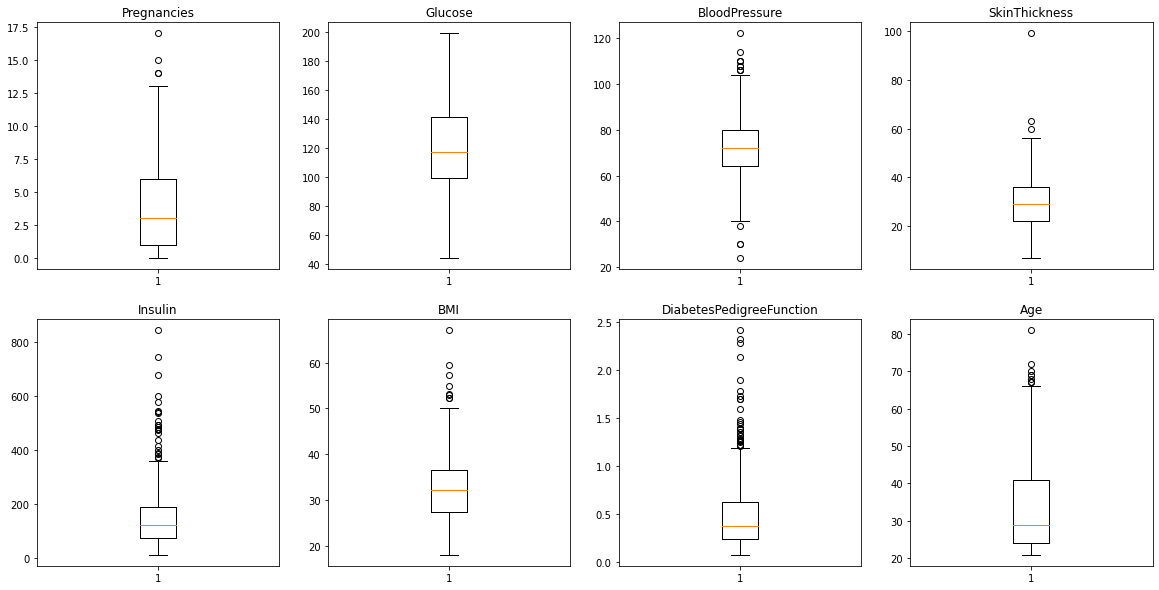

In [5]:
fig1, ((ax0, ax1, ax2, ax3), (ax4, ax5, ax6, ax7)) = plt.subplots(2, 4, figsize=(20, 10))

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7]
cols = df.columns[:-1] # Skip the outcome column

for index, col in enumerate(cols):
    axes[index].boxplot(df[col].dropna())
    axes[index].set_title(col)


plt.show()


### Replace NaN with mean , median, mode.


Other than 'Glucose', all other columns have several outliers which would affect the mean. Hence, for columns with outliers, we will prefer to replace NaN values with median values. 

For Glucose, we will use the mean value. 

There aren't any columns that would benefit from replacing with mode. 

In [6]:
df.Glucose = df.Glucose.fillna(df.Glucose.mean())   # Replace Glucose NaN values with mean
df.fillna(df.median(), inplace=True)                # Replace all other NaN values with median of that column.
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30.0,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29.0,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54.0,1


### Get the correlation matrix of each column


In [7]:
corrM = df.corr()
corrM

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218557,0.192686,0.419064,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208615,0.218557,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192686,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419064,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231128,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


### Get the descriptive statistics of each column

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Inferential Statistics

### Normal Deviate Z Test

(Population mean and std is known in this case)

#### Get the mean and std value of the population from descriptive stats
table.

In [9]:
# Mean & Std-deviation of the Outcomes (from the 'describe' table above)
mean = 0.348958     # 34.9%  people are diabetic
stdev = 0.476951    # 

I am providing a sample dataset, check whether this sample is drawn
from population data using the Z test.

Hypothesis
- H0 - Samples are likely drawn from the same distributions.
- H1 - Samples are likely drawn from different distributions.

Using the Z test, check whether the null hypothesis is going to accept or reject

In [14]:
dfsample = pd.read_excel('sample.xlsx')
dfsample.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
dfsample.shape

(42, 9)

In [17]:
dfsample.Outcome.describe()

count    42.000000
mean      0.523810
std       0.505487
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Outcome, dtype: float64

The sample mean appears to be significantly higher (when just eye-balling it).  Hence, we will perform one tailed test to see if sample mean Ha > Ho. 

In [21]:
dfsample.Outcome.value_counts()

1    22
0    20
Name: Outcome, dtype: int64

In [23]:
# We will compare the 'Outcome' columns for both population (df) and sample (dfsample) usng z-test. 
# The Outcome model is a binary variable (1/0).  
# Hence, we have to use a 1-sample z-test on this column.
# Conditions: n(1-p) must be at least 10.  Here, p is almost 0.5. n = 42.  Hence, n(1-p) > 10 

from statsmodels.stats.proportion import proportions_ztest

# can we assume anything from our sample
significance = 0.05

# our sample - 52.38 % are positive (i.e., diabetic)
sample_size = 42
sample_positive = 22

# our Ho is 0.3489 ==> population mean. 
null_hypothesis = 0.3489

# check our sample against Ho for Ha > Ho
# for Ha > Ho use alternative='larger'
# for Ha != Ho use alternative='two-sided'
stat, p_value = proportions_ztest(count=sample_positive, nobs=sample_size, value=null_hypothesis, alternative='larger')

print('z_stat: %0.3f, p_value: %0.3f' % (stat, p_value))
if p_value > significance:
   print ("Fail to reject the null hypothesis, i.e., samples has same distribution as population.")
else:
   print ("Reject the null hypothesis i.e., sample is not drawn from population")

z_stat: 2.270, p_value: 0.012
Reject the null hypothesis i.e., sample is not drawn from population


###  One Sample T- Test.

(Population mean is known but std is unknown)
- Get the mean value of population from descriptive stats table and find the estimated std of population.

I am providing a sample dataset, check whether this sample is drawn from population data using the one paired t-test.

Hypothesis
- H0 - Samples are likely drawn from the same distributions.
- H1 - Samples are likely drawn from different distributions.

Using the One paired t-test, check whether the null hypothesis is going to accept or reject.

In [24]:
from scipy.stats import ttest_1samp
x = dfsample.Outcome
tscore, pvalue = ttest_1samp(x, popmean=0.3489)
print("t Statistic: ", tscore)  
print("P Value: ", pvalue)


t Statistic:  2.2424787584075556
P Value:  0.030400643706328258


Since it is one tailed test, the real p-value is 0.0304/2 = 0.0152. This is much smaller than 0.05. 
Hence, we can REJECT the null-hypotheses. That is, the samples are from 2 different distributions. 